***
## Table of Contents
<br>
    <ol><h2><a href='#0' style="text-decoration : none; color : #000000;">1. Loading and Cleaning Data </a></h2> </ol>
    <br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">2. Initial Models</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br> 

<ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">3. Feature Transformation with feature selection </a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">4. Feature Transformation with PCA</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

import researchpy as rp

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
# from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score,precision_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import featuretools as ft

from scipy import stats

Using TensorFlow backend.


In [2]:
### Function to plot Feature Importance

def feat_impt_plot(feat_impt,width_s=1000,height_s=1000):
    data = [go.Bar(x=feat_impt.values,y=feat_impt.index.values,text=np.round(feat_impt,4),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6,
            orientation='h'
        )]
    layout = go.Layout(autosize=False,
    width=width_s,
    height=height_s,
    xaxis=dict(title='Feature Importances',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(automargin=True))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    return cm
 

### The dataset contains http elements present on the specified domain
### <a id='0' style="text-decoration : none; color : #000000;"> 1. Loading and Cleaning Data</a>

In [3]:
df_alex=pd.read_csv('Javascript_alexa_output_final_http.csv',low_memory=False)
df_virus=pd.read_csv('Javascript_malicious_output_final_http.csv',low_memory=False)
df_alex['Malicious']=0
df_virus['Malicious']=1

df=pd.concat([df_alex,df_virus])
             
df = df.sample(frac=1,random_state=867).reset_index(drop=True)
df.fillna(value=0,inplace=True)
df=df[df['html_status']=='Success']


### Dropping columns that indicate the html status of domain data collection

df.drop(['html_status','html_status_strerror','html_status_message','Unnamed: 0','number_functions_declared'],axis=1,inplace=True)
df.set_index(['domain'],inplace=True)
df.drop(df.index[29606],inplace=True)

df.Malicious=df.Malicious.apply(lambda x: 'Malicious' if x==1 else 'Non_Malicious')

print("Shape of our dataset:",df.shape)

# df.to_csv('Javascript_dom.csv')

df.head()

Shape of our dataset: (43294, 406)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

#### Let us analyze the balance of classes

In [4]:
data = [go.Bar(x=df.Malicious.value_counts().index.values,
               y=df.Malicious.value_counts().values,
               text=df.Malicious.value_counts().values,
               textposition = 'outside',
            )]
layout = go.Layout( xaxis=dict(title='Domain Type',tickfont=dict(size=12,color='black')),
                    yaxis=dict(title='Number of Instances'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### We can see from the graph that there is high imbalance in the dataset. We can handle it either by oversampling, undersampling or tuning our models to focus on recall/precision to address the problem

#### Cleaning and analyzing the dataset.


#### We know that many of the features will all have no more than one unique value. Hence, we will first identify and drop those features

#### Columns which have do not have any unique values

In [5]:
col_no_unique=[]
for col in df.columns[1:]:
    if len(df[col].value_counts())==1:
        print(col)
        col_no_unique.append(col)

dom_function_document.caretPositionFromPoint(
dom_function_document.caretRangeFromPoint(
dom_function_document.clear(
dom_function_document.createAttributeNS(
dom_function_document.createCDATASection(
dom_function_document.createEntityReference(
dom_function_document.createTouch(
dom_function_document.createTouchList(
dom_function_document.enableStyleSheetsForSet(
dom_function_document.exitPointerLock(
dom_function_document.getAnimations(
dom_function_document.getElementByName(
dom_function_document.getElementsByTagNameNS(
dom_function_document.normalizeDocument(
dom_function_document.queryCommandIndeterm(
dom_function_document.queryCommandValue(
dom_function_document.releaseCapture(
dom_function_document.releaseEvent(
dom_function_document.routeEvent(
dom_function_window.back(
dom_function_window.cancelIdleCallback(
dom_function_window.createImageBitmap(
dom_function_window.disableExternalCapture(
dom_function_window.dump(
dom_function_window.enableExternalCapture(
dom_function_window

In [6]:
print("{} columns have only one unique value in them rendering them less meaningless for classification".format(len(col_no_unique)))

### Drop those columns
df.drop(col_no_unique,axis=1,inplace=True)

print("Shape of our dataset after dropping them:",df.shape)

112 columns have only one unique value in them rendering them less meaningless for classification
Shape of our dataset after dropping them: (43294, 294)


In [7]:
### Check and converting data types
df['Malicious']=df.Malicious.apply(lambda x: 1 if x=='Malicious' else 0)

print("Columns which are of type object:",df.dtypes[(df.dtypes=='object')])

Columns which are of type object: Series([], dtype: object)


#### All of our features are either numerical  in nature.

#### Check for missing data

In [8]:
df.isnull().sum()

dom_function_document.adoptNode(                      0
dom_function_document.captureEvents(                  0
dom_function_document.close(                          0
dom_function_document.createAttribute(                0
dom_function_document.createComment(                  0
dom_function_document.createDocumentFragment(         0
dom_function_document.createElement(                  0
dom_function_document.createElementNS(                0
dom_function_document.createEvent(                    0
dom_function_document.createNodeIterator(             0
dom_function_document.createProcessingInstruction(    0
dom_function_document.createRange(                    0
dom_function_document.createTextNode(                 0
dom_function_document.createTreeWalker(               0
dom_function_document.elementFromPoint(               0
dom_function_document.elementsFromPoint(              0
dom_function_document.execCommand(                    0
dom_function_document.getElementById(           

#### No missing data exists

#### Next check to see which features have less than 5% varying data

In [9]:
lst=[]
for col in df.columns[:-1]:
    lst.append([col,dict(df[col].value_counts()),df[col].value_counts()[0]>=len(df)*0.95])

col_values=pd.DataFrame(lst,columns=['Feature','Value_Counts','95_%_same_values'])
col_values.set_index('Feature',drop=True,inplace=True)
del lst
col_values.head(5)

,Value_Counts,95_%_same_values
Feature,,
dom_function_document.adoptNode(,{0.0: 43294},True
dom_function_document.captureEvents(,"{0.0: 43258, 1.0: 36}",True
dom_function_document.close(,"{0.0: 42914, 1.0: 273, 2.0: 65, 3.0: 14, 4.0: ...",True
dom_function_document.createAttribute(,"{0.0: 43246, 1.0: 38, 3.0: 5, 2.0: 3, 4.0: 2}",True
dom_function_document.createComment(,"{0.0: 43183, 1.0: 103, 2.0: 7, 3.0: 1}",True


In [10]:
col_values['95_%_same_values'].value_counts()

True     235
False     58
Name: 95_%_same_values, dtype: int64

### <a id='1' style="text-decoration : none; color : #000000;"> 2. Initial Models</a>

In [11]:
columns=col_values[col_values['95_%_same_values']==False].index.values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['dom_function_document.createElement(',
 'dom_function_document.getElementById(',
 'dom_function_document.getElementsByTagName(',
 'dom_function_document.querySelector(',
 'dom_function_document.write(',
 'dom_function_window.addEventListener(',
 'dom_function_window.open(',
 'dom_function_window.setTimeout(',
 'js_function_.add(',
 'js_function_.apply(',
 'js_function_.bind(',
 'js_function_.call(',
 'js_function_.charAt(',
 'js_function_.concat(',
 'js_function_.defineProperty(',
 'js_function_.exec(',
 'js_function_.find(',
 'js_function_.forEach(',
 'js_function_.get(',
 'js_function_.getTime(',
 'js_function_.hasOwnProperty(',
 'js_function_.indexOf(',
 'js_function_.join(',
 'js_function_.keys(',
 'js_function_.log(',
 'js_function_.match(',
 'js_function_.pop(',
 'js_function_.push(',
 'js_function_.replace(',
 'js_function_.setTime(',
 'js_function_.shift(',
 'js_function_.slice(',
 'js_function_.split(',
 'js_function_.substr',
 'js_function_.substring(',
 'js_function_.test(

In [12]:
cat_var=[]
num_var=[]
for col in columns:
    if len(df[col].value_counts())==2:
        cat_var.append(col)
    else:
        num_var.append(col)

#### No categorical variables. All the variables are continuous variables

#### lets see if for the rest of continuous variables if there exists any relationship using Point biserial correlation.
####  The PointBiserial Correlation is a special case of Pearson co-rrelation for Correlation between continuous and dichotomus binary variable. 

#### We can also conduct a ttest to see if the two means are different

In [13]:
lst=[]
for col in columns:
    corr=stats.pointbiserialr(df[col],df.Malicious)[0]
    corr_p=stats.pointbiserialr(df[col],df.Malicious)[1]
    ttest=stats.ttest_ind(df[df.Malicious==1][col], df[df.Malicious==0][col], equal_var=False)[0]
    ttest_p=stats.ttest_ind(df[df.Malicious==1][col], df[df.Malicious==0][col], equal_var=False)[1]
    lst.append((corr,corr_p,ttest,ttest_p,col))

In [14]:
stats_df=pd.DataFrame(lst,columns=['Pt. Biserial Corr','Pt. Biserial Corr p-val','ttest','ttest p-val','Feature'])
stats_df.set_index('Feature',drop=True,inplace=True)
stats_df.sort_values(by='ttest',inplace=True)
del lst
stats_df

,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
number_of_cookies,-0.349925,0.000000e+00,-152.836194,0.000000e+00
number_of_unsecure_cookies,-0.345278,0.000000e+00,-149.577298,0.000000e+00
number_of_non_http_only_cookies,-0.335473,0.000000e+00,-148.098816,0.000000e+00
dom_function_document.getElementsByTagName(,-0.206833,0.000000e+00,-94.422955,0.000000e+00
number_of_http_only_cookies,-0.191954,0.000000e+00,-78.875103,0.000000e+00
dom_function_document.createElement(,-0.154604,9.233651e-230,-72.422095,0.000000e+00
js_function_.getTime(,-0.149504,8.006211e-215,-70.045384,0.000000e+00
dom_function_window.addEventListener(,-0.107093,1.299881e-110,-51.397683,0.000000e+00
number_of_secure_cookies,-0.111267,2.660489e-119,-48.907941,0.000000e+00


#### The ttest conduncted supports the results of point biserial correlation. 

#### Hence, we see that all the features we selected are related to the dependent variable.

### Lets start by building some basic models 

In [15]:
### Preparing our training and test sets

X=df[columns].values
y=df.Malicious.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [16]:
## Table to store training and test measures so we can compare later
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='1.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [17]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.876627688752


Predicted  False  True  __all__
Actual                         
False      25806  3801    29607
True         472  4556     5028
__all__    26278  8357    34635

The accuracy of the model on test data is: 0.877353043077


Predicted  False  True  __all__
Actual                         
False       6481   920     7401
True         142  1116     1258
__all__     6623  2036     8659

#### <a id='1.B' style="text-decoration : none; color : #000000;"> B. Random Forest Classifier</a>

In [18]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.886040132814


Predicted  False  True  __all__
Actual                         
False      25967  3640    29607
True         307  4721     5028
__all__    26274  8361    34635

The accuracy of the model on test data is: 0.884513223236


Predicted  False  True  __all__
Actual                         
False       6514   887     7401
True         113  1145     1258
__all__     6627  2032     8659

In [19]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
number_of_cookies,0.223877
number_of_unsecure_cookies,0.208444
number_of_non_http_only_cookies,0.192039
dom_function_document.createElement(,0.059501
number_of_http_only_cookies,0.047944
js_function_.push(,0.034500
dom_function_document.getElementById(,0.029341
js_function_.apply(,0.028031
js_function_.split(,0.015684
js_function_.replace(,0.013709


#### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Extra Tree Classifier</a>

In [20]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.886819691064


Predicted  False  True  __all__
Actual                         
False      25982  3625    29607
True         295  4733     5028
__all__    26277  8358    34635

The accuracy of the model on test data is: 0.884513223236


Predicted  False  True  __all__
Actual                         
False       6518   883     7401
True         117  1141     1258
__all__     6635  2024     8659

In [21]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
number_of_non_http_only_cookies,0.216997
number_of_unsecure_cookies,0.162575
number_of_cookies,0.139957
dom_function_document.getElementsByTagName(,0.059097
dom_function_document.createElement(,0.051125
number_of_http_only_cookies,0.042625
js_function_.replace(,0.030010
js_function_.apply(,0.022593
dom_function_document.getElementById(,0.021858
js_function_.getTime(,0.020606


In [22]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20])

In [23]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_50_test['index']=indx
table_80_50_train['index']=indx

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_50_train)
print("\nTest Set")
display(table_80_50_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.876628,4556.0,25806.0,3801.0,472.0,0.128382,0.093874
RandomForestClassifier,0.886040,4721.0,25967.0,3640.0,307.0,0.122944,0.061058
ExtraTreeClassifier,0.886820,4733.0,25982.0,3625.0,295.0,0.122437,0.058671



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.877353,1116.0,6481.0,920.0,142.0,0.124308,0.112878,0.881407
RandomForestClassifier,0.884513,1145.0,6514.0,887.0,113.0,0.119849,0.089825,0.895163
ExtraTreeClassifier,0.884513,1141.0,6518.0,883.0,117.0,0.119308,0.093005,0.893844


In [24]:
trace0 = go.Scatter(x=table_80_50_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_50_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_50_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_50_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 1')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

#### The results are good. The models seem to be perfoming well and have a good FPR and FNR. Next we will perform feature tranformations to see how we can improve results

### <a id='2' style="text-decoration : none; color : #000000;"> 3. Feature Transformation with feature selection</a>

In [25]:
df.reset_index(inplace=True)

columns=columns.tolist()
columns.append('domain')

df_min=df[columns]

In [26]:
df_min.domain=df_min.domain.astype('str')

In [27]:
es = ft.EntitySet(id = 'malicious')
es.entity_from_dataframe(entity_id = 'data', dataframe = df_min, index = 'domain')

feature_matrix_sessions, features_defs = ft.dfs(entityset=es,target_entity="data",
                                                trans_primitives = ['add','divide','multiply'],n_jobs=-1,
                                                verbose=1,max_depth=1)

Built 6670 features
EntitySet scattered to workers in 7.240 seconds
Elapsed: 01:17 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


#### Lets have a look at the feature set generated

In [28]:
feature_matrix_sessions.head()

,dom_function_document.createElement(,dom_function_document.getElementById(,dom_function_document.getElementsByTagName(,dom_function_document.querySelector(,dom_function_document.write(,dom_function_window.addEventListener(,dom_function_window.open(,dom_function_window.setTimeout(,js_function_.add(,js_function_.apply(,js_function_.bind(,js_function_.call(,js_function_.charAt(,js_function_.concat(,js_function_.defineProperty(,js_function_.exec(,js_function_.find(,js_function_.forEach(,js_function_.get(,js_function_.getTime(,js_function_.hasOwnProperty(,js_function_.indexOf(,js_function_.join(,js_function_.keys(,js_function_.log(,js_function_.match(,js_function_.pop(,js_function_.push(,js_function_.replace(,js_function_.setTime(,js_function_.shift(,js_function_.slice(,js_function_.split(,js_function_.substr,js_function_.substring(,js_function_.test(,js_function_.toLowerCase(,js_function_.toString(,js_function_.trim(,js_function_JSON.parse(,js_function_JSON.stringify(,js_function_Math.floor(,js_function_Math.max(,js_function_Math.random(,js_function_Math.round(,js_function_Object.defineProperty(,js_function_Object.keys(,js_function_decodeURIComponent(,js_function_encodeURIComponent(,js_function_escape(,js_function_isNaN(,js_function_parseInt(,js_function_unescape(,number_of_cookies,number_of_http_only_cookies,number_of_non_http_only_cookies,number_of_secure_cookies,number_of_unsecure_cookies,js_function_.exec( + js_function_Object.defineProperty(,dom_function_document.getElementsByTagName( + js_function_.test(,js_function_.forEach( + js_function_JSON.stringify(,js_function_.exec( + js_function_.shift(,js_function_isNaN( + number_of_secure_cookies,js_function_.indexOf( + js_function_.push(,js_function_.substr + js_function_isNaN(,js_function_Math.floor( + number_of_non_http_only_cookies,js_function_.getTime( + number_of_non_http_only_cookies,dom_function_document.querySelector( + number_of_http_only_cookies,dom_function_document.getElementsByTagName( + js_function_.call(,js_function_isNaN( + js_function_JSON.parse(,js_function_.defineProperty( + js_function_Object.keys(,js_function_Math.floor( + js_function_Object.keys(,js_function_.exec( + number_of_non_http_only_cookies,js_function_.charAt( + js_function_.forEach(,dom_function_document.querySelector( + js_function_.shift(,js_function_.toString( + js_function_.trim(,js_function_Math.max( + js_function_Math.random(,js_function_.match( + js_function_.trim(,js_function_.substr + js_function_Math.floor(,dom_function_document.querySelector( + js_function_.toLowerCase(,js_function_.toString( + js_function_unescape(,js_function_.replace( + js_function_.substring(,dom_function_document.write( + js_function_.defineProperty(,js_function_.charAt( + js_function_.substr,js_function_.bind( + js_function_unescape(,js_function_.concat( + js_function_JSON.stringify(,js_function_.replace( + js_function_isNaN(,js_function_.toString( + number_of_cookies,js_function_.setTime( + number_of_non_http_only_cookies,js_function_.keys( + js_function_.setTime(,js_function_.defineProperty( + js_function_JSON.parse(,dom_function_document.getElementsByTagName( + js_function_encodeURIComponent(,js_function_.charAt( + js_function_.slice(,dom_function_document.getElementById( + js_function_JSON.stringify(,js_function_.concat( + js_function_Object.keys(,dom_function_window.setTimeout( + js_function_.apply(,js_function_Math.floor( + js_function_Math.random(,js_function_.defineProperty( + js_function_Math.random(,dom_function_document.write( + js_function_.push(,dom_function_window.setTimeout( + js_function_Object.keys(,js_function_.push( + js_function_.substring(,js_function_.defineProperty( + js_function_.pop(,js_function_.slice( + js_function_.test(,js_function_.call( + js_function_Math.floor(,js_function_Math.max( + js_function_Object.keys(,js_function_.split( + js_function_isNaN(,dom_function_document.getElementById( + number_of_cookies,js_function_.log( + number_of_unsecure_cookies,js_function_.concat( + js_func

In [29]:
df.set_index(['domain'],drop=True,inplace=True)

fs=pd.merge(feature_matrix_sessions,pd.DataFrame(df.Malicious),left_index=True, right_index=True)

#### Now we have a very huge feature-set and generally more features can cause over-fitting. Hence, we will use a combination of feature selection techniques to select only a few from them.

In [30]:
X=fs.loc[:,df.columns!='Malicious']
y=fs.Malicious
feature_name = X.columns.tolist()

In [31]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


cor_support, cor_feature = cor_selector(X, y)


X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()


rfe_selector = RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=100, step=10, verbose=False)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()


embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()


feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [32]:
X=fs[feature_selection_df[feature_selection_df.Total>=3]['Feature']]
y=fs.Malicious.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(43293, 61)

In [33]:
feature_name

['number_of_non_http_only_cookies + number_of_secure_cookies',
 'js_function_decodeURIComponent( + number_of_cookies',
 'js_function_JSON.parse( + number_of_cookies',
 'js_function_.toString( + number_of_unsecure_cookies',
 'js_function_.toString( + number_of_cookies',
 'js_function_.setTime( + number_of_non_http_only_cookies',
 'js_function_.replace( + number_of_cookies',
 'js_function_.pop( + number_of_unsecure_cookies',
 'js_function_.match( + number_of_non_http_only_cookies',
 'js_function_.hasOwnProperty( + number_of_unsecure_cookies',
 'js_function_.apply( + number_of_cookies',
 'dom_function_window.setTimeout( + number_of_cookies',
 'dom_function_document.getElementsByTagName( + number_of_unsecure_cookies',
 'dom_function_document.getElementById( + number_of_cookies',
 'number_of_unsecure_cookies',
 'number_of_secure_cookies',
 'number_of_non_http_only_cookies',
 'number_of_http_only_cookies',
 'number_of_cookies',
 'js_function_Object.keys( + number_of_unsecure_cookies',
 'js_f

In [34]:
## Table to store training and test measures so we can compare later
table_80_60_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_60_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [35]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.858174048616


Predicted  False  True  __all__
Actual                         
False      29563    56    29619
True        4856   159     5015
__all__    34419   215    34634

The accuracy of the model on test data is: 0.855987989375


Predicted  False  True  __all__
Actual                         
False       7377    12     7389
True        1235    35     1270
__all__     8612    47     8659

#### <a id='2.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [36]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.880897384073


Predicted  False  True  __all__
Actual                         
False      25873  3746    29619
True         379  4636     5015
__all__    26252  8382    34634

The accuracy of the model on test data is: 0.877122069523


Predicted  False  True  __all__
Actual                         
False       6460   929     7389
True         135  1135     1270
__all__     6595  2064     8659

In [37]:
f_r=pd.DataFrame(rf.feature_importances_,index=feature_name)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
number_of_cookies,0.155856
js_function_.toString( + number_of_unsecure_cookies,0.080260
dom_function_window.setTimeout( + number_of_cookies,0.077615
js_function_.toString( + number_of_cookies,0.077153
js_function_.hasOwnProperty( + number_of_unsecure_cookies,0.075914
js_function_.pop( + number_of_unsecure_cookies,0.074879
js_function_.pop( + number_of_non_http_only_cookies,0.070815
js_function_.setTime( + number_of_non_http_only_cookies,0.069799
js_function_.exec( + number_of_non_http_only_cookies,0.045583
dom_function_document.createElement( + number_of_secure_cookies,0.033815


#### <a id='2.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [38]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.881590344748


Predicted  False  True  __all__
Actual                         
False      25892  3727    29619
True         374  4641     5015
__all__    26266  8368    34634

The accuracy of the model on test data is: 0.876429148862


Predicted  False  True  __all__
Actual                         
False       6460   929     7389
True         141  1129     1270
__all__     6601  2058     8659

In [39]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=feature_name)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
number_of_non_http_only_cookies,0.181164
number_of_cookies,0.089661
number_of_non_http_only_cookies + number_of_secure_cookies,0.086172
js_function_.hasOwnProperty( + number_of_unsecure_cookies,0.068801
js_function_.setTime( + number_of_non_http_only_cookies,0.068601
js_function_Object.keys( + number_of_unsecure_cookies,0.064954
dom_function_document.getElementsByTagName( + number_of_unsecure_cookies,0.058087
js_function_JSON.parse( + number_of_cookies,0.038610
js_function_decodeURIComponent( + number_of_cookies,0.025379
js_function_.apply( + number_of_cookies,0.023785


In [40]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))
feat_impt_plot(avg_feat_impt[0:20])

In [41]:
table_80_60_test['index']=indx
table_80_60_train['index']=indx

table_80_60_test.set_index(['index'],drop=True,inplace=True)
table_80_60_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_60_train)
print("\nTest Set")
display(table_80_60_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.858174,159.0,29563.0,56.0,4856.0,0.001891,0.968295
RandomForestClassifier,0.880897,4636.0,25873.0,3746.0,379.0,0.126473,0.075573
ExtraTreeClassifier,0.881590,4641.0,25892.0,3727.0,374.0,0.125831,0.074576



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.855988,35.0,7377.0,12.0,1235.0,0.001624,0.972441,0.512968
RandomForestClassifier,0.877122,1135.0,6460.0,929.0,135.0,0.125727,0.106299,0.883987
ExtraTreeClassifier,0.876429,1129.0,6460.0,929.0,141.0,0.125727,0.111024,0.881624


In [42]:
trace0 = go.Scatter(x=table_80_60_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_60_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_60_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_60_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_60_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_60_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 1')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

### <a id='3' style="text-decoration : none; color : #000000;"> 4. Feature Transformation with PCA</a>

In [43]:
X=fs.loc[:,df.columns!='Malicious']
y=fs.Malicious.values
feature_name = X.columns.tolist()
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

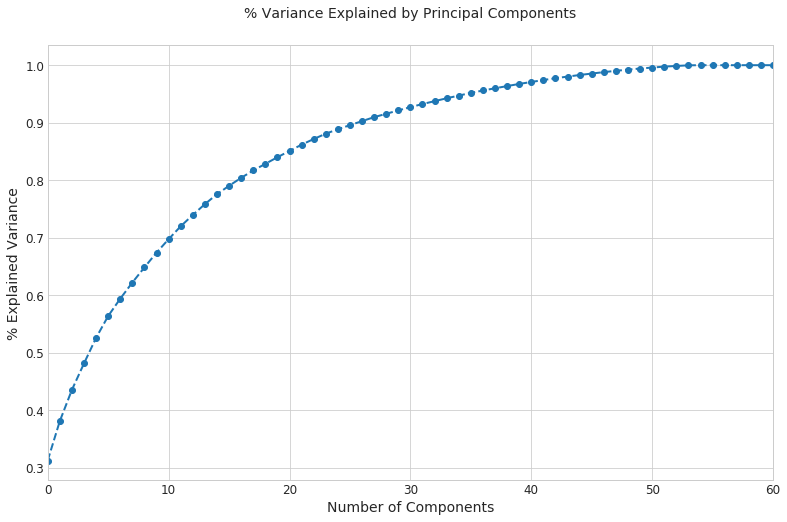

In [44]:
sns.set_style('whitegrid')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(13, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.xlim([0,60])
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.show()

In [45]:
pca=PCA(n_components=53,whiten=True,random_state=0)
X_pca_21=pca.fit_transform(scaled_X)
print("Variance explained using 53 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 53 components is: 0.998716342098


In [46]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_21,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [47]:
## Table to store training and test measures so we can compare later
table_80_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='3.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [48]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.881012877512


Predicted  False  True  __all__
Actual                         
False      26050  3569    29619
True         552  4463     5015
__all__    26602  8032    34634

The accuracy of the model on test data is: 0.878969857951


Predicted  False  True  __all__
Actual                         
False       6509   880     7389
True         168  1102     1270
__all__     6677  1982     8659

#### <a id='3.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [49]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.886758676445


Predicted  False  True  __all__
Actual                         
False      26014  3605    29619
True         317  4698     5015
__all__    26331  8303    34634

The accuracy of the model on test data is: 0.881395080263


Predicted  False  True  __all__
Actual                         
False       6497   892     7389
True         135  1135     1270
__all__     6632  2027     8659

#### <a id='3.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [50]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.88785586418


Predicted  False  True  __all__
Actual                         
False      26016  3603    29619
True         281  4734     5015
__all__    26297  8337    34634

The accuracy of the model on test data is: 0.880355699272


Predicted  False  True  __all__
Actual                         
False       6487   902     7389
True         134  1136     1270
__all__     6621  2038     8659

In [51]:
table_80_70_test['index']=indx
table_80_70_train['index']=indx

table_80_70_test.set_index(['index'],drop=True,inplace=True)
table_80_70_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_70_train)
print("\nTest Set")
display(table_80_70_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.881013,4463.0,26050.0,3569.0,552.0,0.120497,0.110070
RandomForestClassifier,0.886759,4698.0,26014.0,3605.0,317.0,0.121712,0.063210
ExtraTreeClassifier,0.887856,4734.0,26016.0,3603.0,281.0,0.121645,0.056032



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.878970,1102.0,6509.0,880.0,168.0,0.119096,0.132283,0.874310
RandomForestClassifier,0.881395,1135.0,6497.0,892.0,135.0,0.120720,0.106299,0.886490
ExtraTreeClassifier,0.880356,1136.0,6487.0,902.0,134.0,0.122073,0.105512,0.886207


In [52]:
trace0 = go.Scatter(x=table_80_70_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_70_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_70_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_70_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 3')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

#### Both the Extra Tree Model and Random Forest Classifier perform well.  We can try to improve the results by perfroming Grid Search and hypertuning the parameters

### Lets try the same approaches using oversampling (SMOTE technique) to see if we can improve the results

In [53]:
columns=col_values[col_values['95_%_same_values']==False].index.values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['dom_function_document.createElement(',
 'dom_function_document.getElementById(',
 'dom_function_document.getElementsByTagName(',
 'dom_function_document.querySelector(',
 'dom_function_document.write(',
 'dom_function_window.addEventListener(',
 'dom_function_window.open(',
 'dom_function_window.setTimeout(',
 'js_function_.add(',
 'js_function_.apply(',
 'js_function_.bind(',
 'js_function_.call(',
 'js_function_.charAt(',
 'js_function_.concat(',
 'js_function_.defineProperty(',
 'js_function_.exec(',
 'js_function_.find(',
 'js_function_.forEach(',
 'js_function_.get(',
 'js_function_.getTime(',
 'js_function_.hasOwnProperty(',
 'js_function_.indexOf(',
 'js_function_.join(',
 'js_function_.keys(',
 'js_function_.log(',
 'js_function_.match(',
 'js_function_.pop(',
 'js_function_.push(',
 'js_function_.replace(',
 'js_function_.setTime(',
 'js_function_.shift(',
 'js_function_.slice(',
 'js_function_.split(',
 'js_function_.substr',
 'js_function_.substring(',
 'js_function_.test(

In [54]:
### Preparing our training and test sets
X=df[columns].values
y=df.Malicious.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

The train/test split ratio is 80:20


In [55]:
## Table to store training and test measures so we can compare later
table_80_80_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_80_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [56]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.907150336069


Predicted  False   True  __all__
Actual                          
False      24943   4664    29607
True         834  28773    29607
__all__    25777  33437    59214

The accuracy of the model on test data is: 0.859337105901


Predicted  False  True  __all__
Actual                         
False       6250  1151     7401
True          67  1191     1258
__all__     6317  2342     8659

In [57]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.923227615091


Predicted  False   True  __all__
Actual                          
False      25499   4108    29607
True         438  29169    29607
__all__    25937  33277    59214

The accuracy of the model on test data is: 0.873080032336


Predicted  False  True  __all__
Actual                         
False       6377  1024     7401
True          75  1183     1258
__all__     6452  2207     8659

In [58]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
number_of_cookies,0.224798
number_of_unsecure_cookies,0.203100
number_of_non_http_only_cookies,0.173830
dom_function_document.createElement(,0.073539
number_of_http_only_cookies,0.069257
js_function_.apply(,0.040535
js_function_.push(,0.031517
js_function_.split(,0.024897
dom_function_document.getElementById(,0.018876
js_function_.replace(,0.012892


In [59]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.923565373054


Predicted  False   True  __all__
Actual                          
False      25513   4094    29607
True         432  29175    29607
__all__    25945  33269    59214

The accuracy of the model on test data is: 0.87331100589


Predicted  False  True  __all__
Actual                         
False       6381  1020     7401
True          77  1181     1258
__all__     6458  2201     8659

In [60]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
number_of_non_http_only_cookies,0.229072
number_of_unsecure_cookies,0.174602
number_of_cookies,0.123096
dom_function_document.createElement(,0.096580
js_function_.getTime(,0.044564
js_function_.apply(,0.026289
dom_function_document.getElementsByTagName(,0.021590
number_of_http_only_cookies,0.021552
dom_function_window.addEventListener(,0.017625
js_function_.push(,0.014912


In [61]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

In [62]:
table_80_80_test['index']=indx
table_80_80_train['index']=indx

table_80_80_test.set_index(['index'],drop=True,inplace=True)
table_80_80_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_80_train)
print("\nTest Set")
display(table_80_80_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.907150,28773.0,24943.0,4664.0,834.0,0.157530,0.028169
RandomForestClassifier,0.923228,29169.0,25499.0,4108.0,438.0,0.138751,0.014794
ExtraTreeClassifier,0.923565,29175.0,25513.0,4094.0,432.0,0.138278,0.014591



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.859337,1191.0,6250.0,1151.0,67.0,0.155520,0.053259,0.895611
RandomForestClassifier,0.873080,1183.0,6377.0,1024.0,75.0,0.138360,0.059618,0.901011
ExtraTreeClassifier,0.873311,1181.0,6381.0,1020.0,77.0,0.137819,0.061208,0.900486


In [63]:
trace0 = go.Scatter(x=table_80_80_test.iloc[0].index.values[[0,5,6,7]],
                    y=table_80_80_test.iloc[0].values[[0,5,6,7]],
                    mode = 'lines',
                    name = 'Neural_Network')

trace1 = go.Scatter(x=table_80_80_test.iloc[1].index.values[[0,5,6,7]],
                    y=table_80_80_test.iloc[1].values[[0,5,6,7]],
                    mode = 'lines+markers',
                    name = 'RandomForestClassifier')

trace2 = go.Scatter(x=table_80_80_test.iloc[2].index.values[[0,5,6,7]],
                    y=table_80_80_test.iloc[2].values[[0,5,6,7]],
                    mode = 'lines+markers',marker=dict(symbol='x'),
                    name = 'ExtraTree Classifier')

data = [trace0, trace1, trace2]
layout = go.Layout(yaxis=dict(tick0=0,dtick=0.05),title='Result comparision for Features selected in Section 3')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='Result')

### Lets now see the results of undersampling. 

In [64]:
df_non=df[df.Malicious==0]
df_mal=df[df.Malicious==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)
df_u.Malicious.value_counts() 

X=df_u[columns]
y=df_u.Malicious.values

feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (12572, 294)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.execCommand(,dom_function_document.getElementById(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.dispatchEvent(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.getComputedStyle(,dom_function_window.getSelection(,dom_function_window.matchMedia(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollTo(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setTimeout(,dom_function_window.stop(,js_function_.add(,js_function_.all(,js_function_.anchor(,js_function_.apply(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_function_.call(,js_function_.catch(,js_function_.charAt(,js_function_.charCodeAt(,js_function_.clear(,js_function_.codePointAt(,js_function_.compile(,js_function_.concat(,js_function_.construct(,js_function_.defineProperty(,js_function_.delete(,js_function_.deleteProperty(,js_function_.endWith(,js_function_.entries(,js_function_.every(,js_function_.exec(,js_function_.fill(,js_function_.filter(,js_function_.find(,js_function_.findIndex(,js_function_.flatMap(,js_function_.fontcolor(,js_function_.forEach(,js_function_.from(,js_function_.get(,js_function_.getDate(,js_function_.getDay(,js_function_.getFullYear(,js_function_.getHours(,js_function_.getInt16(,js_function_.getInt32(,js_function_.getInt8(,js_function_.getMilliseconds(,js_function_.getMinutes(,js_function_.getMonth(,js_function_.getOwnPropertyDescriptor(,js_function_.getPrototypeOf(,js_function_.getSeconds(,js_function_.getTime(,js_function_.getTimezoneOffset(,js_function_.getUTCDate(,js_function_.getUTCDay(,js_function_.getUTCFullYear(,js_function_.getUTCHours(,js_function_.getUTCMilliseconds(,js_function_.getUTCMinutes(,js_function_.getUTCMonth(,js_function_.getUTCSeconds(,js_function_.getUint16(,js_function_.getUint32(,js_function_.getUint8(,js_function_.getYear(,js_function_.has(,js_function_.hasOwnProperty(,js_function_.includes(,js_function_.indexOf(,js_function_.isExtensible(,js_function_.isPrototypeOf(,js_function_.italics(,js_function_.join(,js_function_.keys(,js_function_.lastIndexOf(,js_function_.link(,js_function_.localeCompare(,js_function_.log(,js_function_.map(,js_function_.match(,js_function_.min(,js_function_.next(,js_function_.normalize(,js_function_.of(,js_function_.o

In [65]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)


The train/test split ratio is 80:20


In [66]:
## Table to store training and test measures so we can compare later
table_80_90_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_90_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

In [67]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.896987173119


Predicted  False  True  __all__
Actual                         
False       4283   767     5050
True         269  4738     5007
__all__     4552  5505    10057

The accuracy of the model on test data is: 0.893439363817


Predicted  False  True  __all__
Actual                         
False       1035   201     1236
True          67  1212     1279
__all__     1102  1413     2515

In [68]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.917967584767


Predicted  False  True  __all__
Actual                         
False       4325   725     5050
True         100  4907     5007
__all__     4425  5632    10057

The accuracy of the model on test data is: 0.902584493042


Predicted  False  True  __all__
Actual                         
False       1043   193     1236
True          52  1227     1279
__all__     1095  1420     2515

In [69]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
number_of_cookies,0.217888
number_of_unsecure_cookies,0.206444
number_of_non_http_only_cookies,0.185268
dom_function_document.createElement(,0.068790
number_of_http_only_cookies,0.044088
js_function_.split(,0.041052
js_function_.push(,0.031526
js_function_.indexOf(,0.027651
dom_function_document.getElementById(,0.017656
js_function_.apply(,0.016844


In [70]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.921248881376


Predicted  False  True  __all__
Actual                         
False       4332   718     5050
True          74  4933     5007
__all__     4406  5651    10057

The accuracy of the model on test data is: 0.905367793241


Predicted  False  True  __all__
Actual                         
False       1042   194     1236
True          44  1235     1279
__all__     1086  1429     2515

In [71]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
number_of_cookies,0.173937
number_of_unsecure_cookies,0.132986
number_of_non_http_only_cookies,0.112360
dom_function_document.createElement(,0.070566
dom_function_document.getElementsByTagName(,0.051160
js_function_.getTime(,0.045442
js_function_.push(,0.041464
number_of_http_only_cookies,0.034507
dom_function_window.addEventListener(,0.027824
js_function_.apply(,0.027180


In [72]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt)

In [73]:
table_80_90_test['index']=indx
table_80_90_train['index']=indx

table_80_90_test.set_index(['index'],drop=True,inplace=True)
table_80_90_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_90_train)
print("\nTest Set")
display(table_80_90_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.896987,4738.0,4283.0,767.0,269.0,0.151881,0.053725
RandomForestClassifier,0.917968,4907.0,4325.0,725.0,100.0,0.143564,0.019972
ExtraTreeClassifier,0.921249,4933.0,4332.0,718.0,74.0,0.142178,0.014779



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.893439,1212.0,1035.0,201.0,67.0,0.162621,0.052385,0.892497
RandomForestClassifier,0.902584,1227.0,1043.0,193.0,52.0,0.156149,0.040657,0.901597
ExtraTreeClassifier,0.905368,1235.0,1042.0,194.0,44.0,0.156958,0.034402,0.904320


In [75]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')